In [1]:
import pandas as pd
import numpy as np

# Reproduce the same result every time if the script is kept consistent otherwise each run will produce different results (for classification)
np.random.seed(500)
    
#[1] Read the data
Corpus = pd.read_json(r"C:\Users\Panos\Desktop\Dissert\Code\Sample_Video_Games_5.json", lines=True, encoding='latin-1')

#Print the first 3 rows
Corpus.iloc[:3]

#Remove review with blank reviewText
Corpus = Corpus[~Corpus['reviewText'].isnull()]

In [2]:
import nltk
from nltk.probability import FreqDist
import os
from collections import Counter
import statistics

#Calculate the total number of unique video games
asinString = " ".join(Corpus['asin'])
tokens = nltk.word_tokenize(asinString)
fdist = FreqDist(tokens)
count_asin = len(fdist)

# Calculate the total number of unique reviewers
reviewerIDString = " ".join(Corpus['reviewerID'])
tokens = nltk.word_tokenize(reviewerIDString)
fdist = FreqDist(tokens)
count_reviewerID = len(fdist)

# Set data in variables for the dataframe
totalReviews = int(Corpus.shape[0])
file_size = os.path.getsize(r"C:\Users\Panos\Desktop\Dissert\Code\Video_Games_5.json")
fileSize = int(round((file_size/2**20),2))
avgPerUser = int(round(statistics.mean(Counter(Corpus['reviewerID']).values()),2))
avgPerVG = int(round(statistics.mean(Counter(Corpus['asin']).values()),2))
minReviews = min(Counter(Corpus['asin']).values())
maxReviews = max(Counter(Corpus['asin']).values())

# Create a new dataframe to print a cool table
d1 = {'Description': ["Total reviews",
                      "File size (MB)",
                      "Total number of unique video games",
                      "Total number of unique reviewers",
                      "Average number of reviews per user", 
                      "Average number of reviews per videogame",
                      "Videogame with the minimum reviews",
                      "Videogame with the maximum reviews"],
      'Data': [totalReviews, fileSize, count_asin, count_reviewerID, avgPerUser, avgPerVG, minReviews, maxReviews]}

df1 = pd.DataFrame(data=d1)
df1

,Description,Data
0,Total reviews,100
1,File size (MB),304
2,Total number of unique video games,9
3,Total number of unique reviewers,100
4,Average number of reviews per user,1
5,Average number of reviews per videogame,11
6,Videogame with the minimum reviews,5
7,Videogame with the maximum reviews,25


In [3]:
from textblob import TextBlob
# from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot 
# init_notebook_mode(connected=True)
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)
from sklearn.feature_extraction.text import CountVectorizer
#https://towardsdatascience.com/a-complete-exploratory-data-analysis-and-visualization-for-text-data-29fb1b96fb6a

#add extra columns to help visualize
Corpus['polarity'] = Corpus['reviewText'].map(lambda text: TextBlob(text).sentiment.polarity)
Corpus['review_len'] = Corpus['reviewText'].astype(str).apply(len)
Corpus['word_count'] = Corpus['reviewText'].apply(lambda x: len(str(x).split()))

# print('5 random reviews with the highest positive sentiment polarity: \n')
# cl = Corpus.loc[Corpus.polarity == 1, ['reviewText']].sample(5).values
# for c in cl:
#     print(c[0])
    
# print('5 random reviews with the most neutral sentiment(zero) polarity: \n')
# cl = Corpus.loc[Corpus.polarity == 0, ['reviewText']].sample(5).values
# for c in cl:
#     print(c[0])
    
# print('5 reviews with the most negative polarity: \n')
# cl = Corpus.loc[Corpus.polarity == -0.97500000000000009, ['Review Text']].sample(2).values
# for c in cl:
#     print(c[0])

In [4]:
#The distribution of review ratings

Corpus['overall'].iplot(
    kind='hist',
    xTitle='rating',
    linecolor='black',
    yTitle='count',
    title='Review Rating Distribution')

In [5]:
#The distribution review text lengths

Corpus['review_len'].iplot(
    kind='hist',
    bins=100,
    xTitle='review length',
    linecolor='black',
    yTitle='count',
    title='Review Text Length Distribution')

In [6]:
#The distribution of review sentiment polarity score

Corpus['polarity'].iplot(
    kind='hist',
    bins=50,
    xTitle='polarity',
    linecolor='black',
    yTitle='count',
    title='Sentiment Polarity Distribution')

In [7]:
#The distribution of review word count

Corpus['word_count'].iplot(
    kind='hist',
    bins=100,
    xTitle='word count',
    linecolor='black',
    yTitle='count',
    title='Review Text Word Count Distribution')

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
The top 30 words are: 
('good', 'great', 'first', 'other', 'little', 'much', 'new', 'many', 'bad', 'nice', 'few', 'old', 'huge', 'same', 'comfortable', 'real', 'boring', 'true', 'sure', 'long', 'online', 'fun', 'perfect', 'own', 'happy', 'big', 'realistic', 'different', 'arcade', 'ok')
Their respective frequencies: 
(37, 32, 15, 13, 9, 9, 8, 8, 8, 8, 7, 7, 6, 6, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4)
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
    count         word
0      37         good
1      32        great
2      15        first
3      13        other
4       9       little
5       9         much
6       8          new
7       8         many
8       8          bad
9       8         nice
10      7          few
11      7          old
12      6         huge
13      6         same
14      6  comfortable
15      6         real
16      6       boring
17      6         true
18      5         

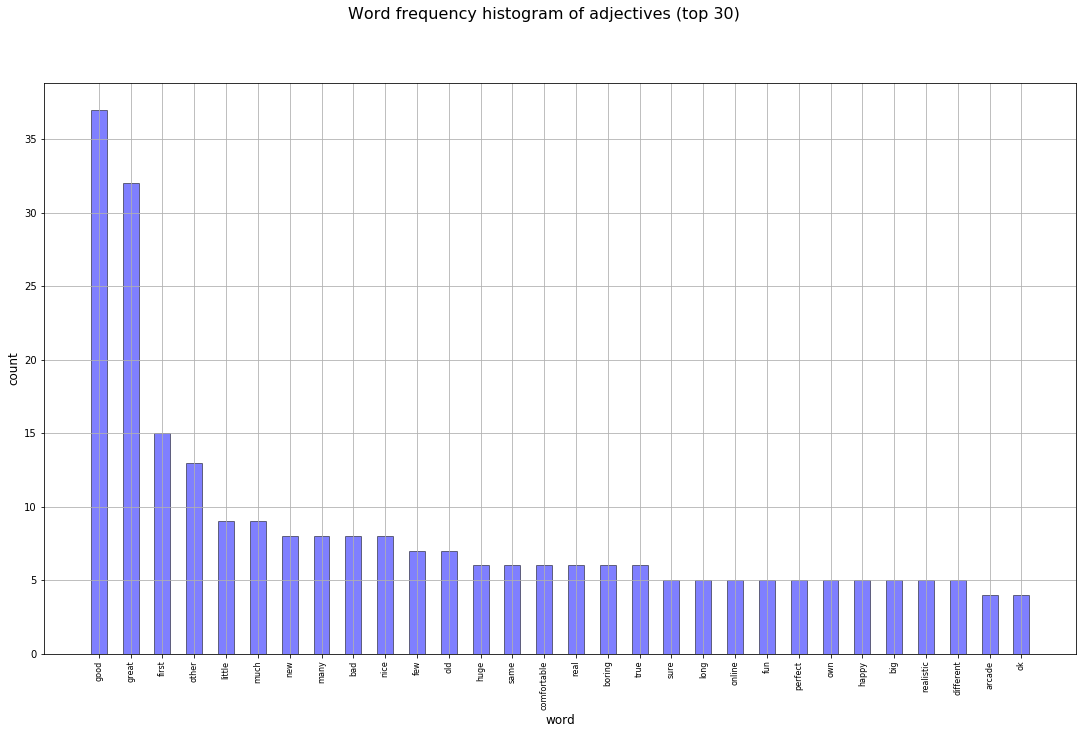

In [18]:
from wordcloud import WordCloud, STOPWORDS
from matplotlib import pyplot as plt
import string
import operator
import sys

# Join all reviews into one string
reviewString = Corpus["reviewText"].str.cat(sep=' ')

# Keep the adjectives using nltk
tokens = nltk.word_tokenize(str(reviewString))
tags = nltk.pos_tag(tokens)
adjectives = [word for word,pos in tags if (pos == 'JJ')]

finalString = " ".join(adjectives)

punct = set(string.punctuation)
reviews_unpunct = ''.join(x for x in finalString if x not in punct)

# Split string into list of strings, again
word_list = reviews_unpunct.split()

# Perform count
counts_all = Counter(word_list)

words, count_values = zip(*counts_all.items())

# Sort both lists by frequency in values (Schwartzian transform) - thanks, http://stackoverflow.com/questions/9543211/sorting-a-list-in-python-using-the-result-from-sorting-another-list
values_sorted, words_sorted = zip(*sorted(zip(count_values, words), key=operator.itemgetter(0), reverse=True))

# Top 10
words_sorted_top = words_sorted[0:30]
values_sorted_top = values_sorted[0:30]

print("- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -")
print("The top {0} words are: \n{1}".format(30, words_sorted_top))
print("Their respective frequencies: \n{0}".format(values_sorted_top))
print("- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -")
# Pandas DataFrame just for visualisation
df = pd.DataFrame({'count': values_sorted_top, 'word': words_sorted_top})
print("{0}".format(df))
sys.stdout.flush()
        
# Make xticklabels comprehensible by matplotlib
xticklabels = str(list(words_sorted_top)).split()
# Remove the single quotes, commas and enclosing square brackets
xtlabs = [xstr.replace("'","").replace(",","").replace("]","").replace("[","") for xstr in xticklabels]

# Create the histogram
indices = np.arange(len(words_sorted_top))
width = 0.5
fig = plt.figure()
fig.suptitle('Word frequency histogram of adjectives (top {0})'.format(30), fontsize=16)
fig.set_size_inches(18.5, 10.5, forward=True)
plt.grid()
plt.xlabel('word', fontsize=12)
plt.ylabel('count', fontsize=12)
plt.bar(indices, values_sorted_top, width, edgecolor='k', facecolor='blue', alpha=0.5)
plt.xticks(indices, xtlabs, rotation='vertical', fontsize=8)
plt.show()

In [9]:
#The distribution of top unigrams before removing stop words

def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words = get_top_n_words(Corpus['reviewText'], 20)
# for word, freq in common_words:
#     print(word, freq)
    
df1 = pd.DataFrame(common_words, columns = ['reviewText' , 'count'])
df1.groupby('reviewText').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 words in review before removing stop words')

In [10]:
#The distribution of top unigrams after removing stop words

def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words = get_top_n_words(Corpus['reviewText'], 20)
# for word, freq in common_words:
#     print(word, freq)
    
df2 = pd.DataFrame(common_words, columns = ['reviewText' , 'count'])
df2.groupby('reviewText').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 words in review after removing stop words')

In [11]:
#The distribution of top bigrams before removing stop words

def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words = get_top_n_bigram(Corpus['reviewText'], 20)
# for word, freq in common_words:
#     print(word, freq)
    
df3 = pd.DataFrame(common_words, columns = ['reviewText' , 'count'])
df3.groupby('reviewText').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 bigrams in review before removing stop words')

In [12]:
#The distribution of top bigrams after removing stop words

def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words = get_top_n_bigram(Corpus['reviewText'], 20)
# for word, freq in common_words:
#     print(word, freq)
    
df4 = pd.DataFrame(common_words, columns = ['reviewText' , 'count'])
df4.groupby('reviewText').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 bigrams in review after removing stop words')

In [13]:
#The distribution of Top trigrams before removing stop words

def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words = get_top_n_trigram(Corpus['reviewText'], 20)
# for word, freq in common_words:
#     print(word, freq)
    
df5 = pd.DataFrame(common_words, columns = ['reviewText' , 'count'])
df5.groupby('reviewText').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 trigrams in review before removing stop words')

In [14]:
#The distribution of Top trigrams after removing stop words

def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words = get_top_n_trigram(Corpus['reviewText'], 20)
# for word, freq in common_words:
#     print(word, freq)

df6 = pd.DataFrame(common_words, columns = ['reviewText' , 'count'])
df6.groupby('reviewText').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 trigrams in review after removing stop words')

# For categorical features, we simply use bar chart to present the frequency.
# The distribution of division
# df.groupby('Division Name').count()['Clothing ID'].iplot(kind='bar', yTitle='Count', linecolor='black', opacity=0.8,
#                                                            title='Bar chart of Division Name', xTitle='Division Name')

In [15]:
import plotly.graph_objs as go
from plotly.offline import iplot

#2D Density jointplot of sentiment polarity vs. rating
#There were few people are very positive or very negative.

trace1 = go.Scatter(
    x=Corpus['polarity'], y=Corpus['overall'], mode='markers', name='points',
    marker=dict(color='rgb(102,0,0)', size=2, opacity=0.4)
)
trace2 = go.Histogram2dContour(
    x=Corpus['polarity'], y=Corpus['overall'], name='density', ncontours=20,
    colorscale='Hot', reversescale=True, showscale=False
)
trace3 = go.Histogram(
    x=Corpus['polarity'], name='Sentiment polarity density',
    marker=dict(color='rgb(102,0,0)'),
    yaxis='y2'
)
trace4 = go.Histogram(
    y=Corpus['overall'], name='Rating density', marker=dict(color='rgb(102,0,0)'),
    xaxis='x2'
)
data = [trace1, trace2, trace3, trace4]

layout = go.Layout(
    showlegend=False,
    autosize=False,
    width=600,
    height=550,
    xaxis=dict(
        domain=[0, 0.85],
        showgrid=False,
        zeroline=False
    ),
    yaxis=dict(
        domain=[0, 0.85],
        showgrid=False,
        zeroline=False
    ),
    margin=dict(
        t=50
    ),
    hovermode='closest',
    bargap=0,
    xaxis2=dict(
        domain=[0.85, 1],
        showgrid=False,
        zeroline=False
    ),
    yaxis2=dict(
        domain=[0.85, 1],
        showgrid=False,
        zeroline=False
    )
)

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='2dhistogram-2d-density-plot-subplots')

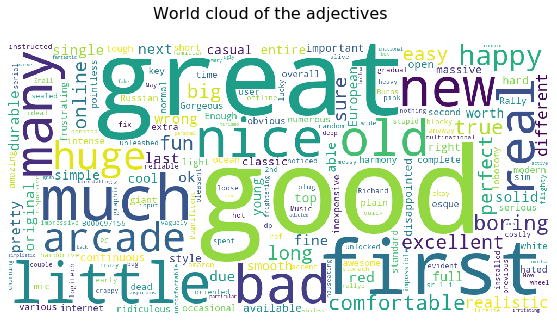

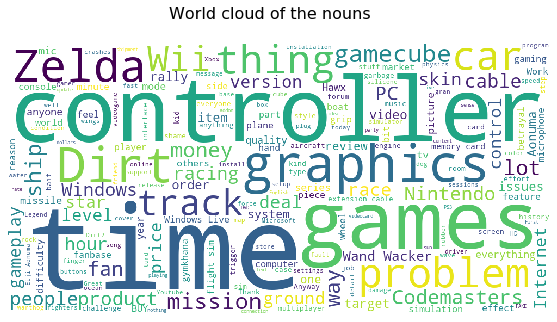

In [16]:
#Word cloud of the adjectives

# finalString initialized on previous block of code

stop = set(STOPWORDS)
stop.add('game')
        
wc = WordCloud(height = 500, width = 1000, background_color = 'white', stopwords = stop).generate(finalString)
plt.figure(figsize=(10,5))
img = plt.imshow(wc,cmap='gray')
img.set_cmap('hot')
plt.axis('off')
plt.suptitle('World cloud of the adjectives', fontsize=16)
plt.savefig('pict.png',bbox_inches='tight', pad_inches = 0)

#----------------------------------------------------------------

# Word cloud of the nouns

nouns = [word for word,pos in tags if (pos == 'NN' or pos == 'NNP' or pos == 'NNS' or pos == 'NNPS')]

finalString = " ".join(nouns)
        
stop = set(STOPWORDS)
stop.add('fun')
stop.add('play')
stop.add('game')
        
wc = WordCloud(height = 500, width = 1000, background_color = 'white', stopwords = stop).generate(finalString)
plt.figure(figsize=(10,5))
img = plt.imshow(wc,cmap='gray')
img.set_cmap('hot')
plt.axis('off')
plt.suptitle('World cloud of the nouns', fontsize=16)
plt.savefig('pict.png',bbox_inches='tight', pad_inches = 0)

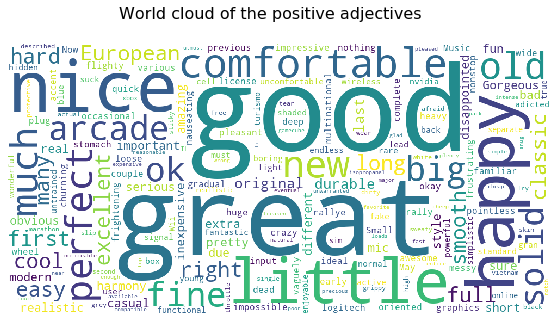

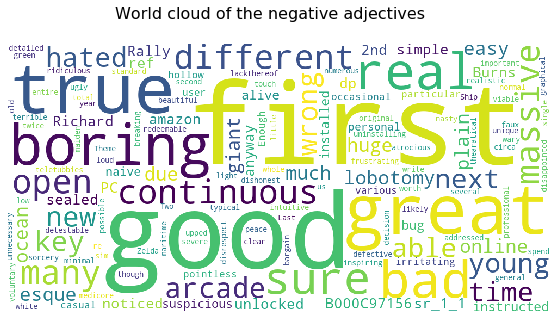

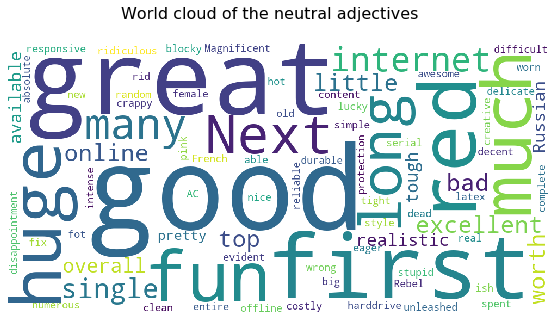

In [17]:
# Word cloud of the adjectives of the positive reviews

Positives_Corpus = Corpus.loc[(Corpus['overall'] == 4.0) | (Corpus['overall'] == 5.0)]

reviewString = " ".join(Positives_Corpus['reviewText'])

tokens = nltk.word_tokenize(reviewString)
tags = nltk.pos_tag(tokens)
adjectives = [word for word,pos in tags if (pos == 'JJ')]

finalString = " ".join(adjectives)
        
stop = set(STOPWORDS)
stop.add('game')
        
wc = WordCloud(height = 500, width = 1000, background_color = 'white', stopwords = stop).generate(finalString)
plt.figure(figsize=(10,5))
img = plt.imshow(wc,cmap='gray')
img.set_cmap('hot')
plt.axis('off')
plt.suptitle('World cloud of the positive adjectives', fontsize=16)
plt.savefig('pict.png',bbox_inches='tight', pad_inches = 0)

#---------------------------------------------------------------

# Word cloud of the adjectives of the negative reviews

Positives_Corpus = Corpus.loc[(Corpus['overall'] == 1.0) | (Corpus['overall'] == 2.0)]

reviewString = " ".join(Positives_Corpus['reviewText'])

tokens = nltk.word_tokenize(reviewString)
tags = nltk.pos_tag(tokens)
adjectives = [word for word,pos in tags if (pos == 'JJ')]

finalString = " ".join(adjectives)
        
stop = set(STOPWORDS)
stop.add('game')
        
wc = WordCloud(height = 500, width = 1000, background_color = 'white', stopwords = stop).generate(finalString)
plt.figure(figsize=(10,5))
img = plt.imshow(wc,cmap='gray')
img.set_cmap('hot')
plt.axis('off')
plt.suptitle('World cloud of the negative adjectives', fontsize=16)
plt.savefig('pict.png',bbox_inches='tight', pad_inches = 0)

#----------------------------------------------------------------

# Word cloud of the adjectives of the neutral reviews

Positives_Corpus = Corpus.loc[(Corpus['overall'] == 3.0)]

reviewString = " ".join(Positives_Corpus['reviewText'])

tokens = nltk.word_tokenize(reviewString)
tags = nltk.pos_tag(tokens)
adjectives = [word for word,pos in tags if (pos == 'JJ')]

finalString = " ".join(adjectives)
        
stop = set(STOPWORDS)
stop.add('game')
        
wc = WordCloud(height = 500, width = 1000, background_color = 'white', stopwords = stop).generate(finalString)
plt.figure(figsize=(10,5))
img = plt.imshow(wc,cmap='gray')
img.set_cmap('hot')
plt.axis('off')
plt.suptitle('World cloud of the neutral adjectives', fontsize=16)
plt.savefig('pict.png',bbox_inches='tight', pad_inches = 0)